this library need ,  first install them

In [1]:
!pip install hazm
!pip install python-bidi
!pip install arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 6.7 MB/s 
     |████████████████████████████████| 1.4 MB 64.0 MB/s 
     |████████████████████████████████| 233 kB 51.3 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=9d5054404be36ce68bcd2071bb542c5fffcbc35d09f97fc076260e32349f2a30
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154833 sha256=31d605570e021a6799c915b9405cd6cdfea267652885f89f73338fe3ecfdd2c8
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Looking in indexes: ht

In [2]:
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from collections import Counter
from hazm import *

# persian transformer
from bidi.algorithm import get_display
import arabic_reshaper

# sklearn package
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/Colab Notebooks/data/"
# comments-forClassificationAndClutering.csv

Mounted at /content/drive/


In [4]:
dataset = pd.read_csv(path+ "comments-forClassificationAndClutering.csv")
dataset['split'] = np.random.randn(dataset.shape[0], 1)
msk = np.random.rand(len(dataset)) <= 0.7
train = dataset[msk]
train['body'].isnull().sum()
train['recommendation_status'].isnull().sum()
train = train[train['body'].notna()]
train = train[train['recommendation_status'].notna()]
train= train.reset_index(level=0)
# test
test = dataset[~msk]
test['body'].isnull().sum()
test['recommendation_status'].isnull().sum()
test = test[test['body'].notna()]
test = test[test['recommendation_status'].notna()]
test= test.reset_index(level=0)

In [ ]:
print(train)

        index        advantages  \
0           2  ["پشتیبانی خوب"]   
1           3                []   
2           4                []   
3           5                []   
4           6    ["قیمت ارزان"]   
...       ...               ...   
89494  158125                []   
89495  158126                []   
89496  158127                []   
89497  158128                []   
89498  158130                []   

                                                    body        created_at  \
0                            عالی بود حتما پیشنهاد میکنم   12 فروردین 1401   
1      بعد از یک روز اکانت قفل شد دوباره با پشتیبانی ...   15 فروردین 1401   
2                                                   عالی  30 اردیبهشت 1401   
3            گیفت کارت تقلبی و غیر اصل و بدونه پشتی بانی   16 فروردین 1401   
4      قیمت خوبی داره وبصرفه هست ولی پشتیبانیشون یکم ...   26 فروردین 1401   
...                                                  ...               ...   
89494        هر جایی رشد نمیکنه و

# read train & test data

In [ ]:
def read(name = 'HAMtrain'):


    data = pd.read_csv('{}.txt'.format(name), header = None,sep='@@@@@@@@@@',engine='python',encoding='utf-8')

    # data[0] >>>>>>>>>>>>>>>>label
    # data[1] >>>>>>>>>>>>>>>>news
    # data.shape : (2580,2)

    return data

# plot distribution of topics in train corpus

In [5]:
# plot for persian  it's not OK  this function solve this problem
def make_farsi_text(x):
    output=[]
    for i in x:
        reshaped_text = arabic_reshaper.reshape(i)
        farsi_text    = get_display(reshaped_text)
        output.append(farsi_text)
    return output


In [ ]:
def barplot():

    data=dataset
    dfToList = data['recommendation_status'].tolist()

    #find number of each news topic
    counts=Counter(dfToList)
    
    # as we corpus has six topic and we can visualize them by unique color

    X = np.arange(len(counts))
    pl.bar(X, counts.values(), align='center', width=0.5,color=['red','orange','lightblue','lightgreen','green'])
    pl.xticks(X,make_farsi_text(counts.keys()))
    ymax = max(counts.values()) +20
    pl.ylim(0, ymax)
    plt.savefig('topic.png')
    pl.show()


TypeError: ignored

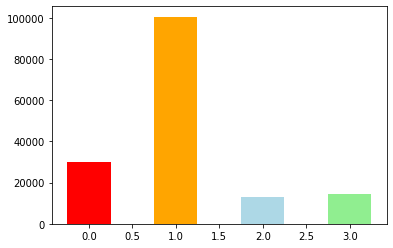

In [ ]:
barplot()

# preprocess of data

In [7]:
def preprocessing(datasetName):

    data = datasetName
    
# Use Hazm for preprocess of data :
    stopwords  = stopwords_list()
    normalizer = Normalizer()
    lemmatizer = Lemmatizer()
    puncList   = [".", ";", ":", "!", "?", "/", "\\", ",", "#", "@", "$", "&", ")", "(", "\"", "\'\'"]
    stopwords.append(puncList)

    for i in range(len(data)):
        print(i)

        data['body'][i] = normalizer.normalize(data['body'][i])
        data['body'][i] = word_tokenize(data['body'][i])
        data['body'][i] = [w for w in  data['body'][i] if not w in stopwords]
        data['body'][i] = [lemmatizer.lemmatize(w) for w in  data['body'][i]]

        
        
    
    return data


# Feature Extraction by tf-idf

In [9]:
def model():
    data      = preprocessing(train)
    data_test = preprocessing(test)
    

    X_train   = data["body"].tolist()
    y_train   = data['recommendation_status'].tolist()
    
    del data

    X_test    = data_test["body"].tolist()
    y_test    = data_test['recommendation_status'].tolist()
    
    del data_test
    
#     conver lables of data to numbers 
    label_encoder = LabelEncoder()
    y_train       = label_encoder.fit_transform(y_train)
    y_test        = label_encoder.transform(y_test)


    countV  = CountVectorizer(min_df=2, max_features=89499 ,lowercase=False,tokenizer=lambda doc: doc)
    X_train = countV.fit_transform(X_train)
    tfidf   = TfidfTransformer()
    X_train = tfidf.fit_transform(X_train)
    
    print(X_train.shape)

    X_test  = countV.transform(X_test)
    X_test  = tfidf.transform(X_test)
    
    print(X_test.shape)
    
    

    with open(path+'X_train.pickle', 'wb') as output:
       pickle.dump(X_train, output)
    
    with open(path+'X_test.pickle', 'wb') as output:
       pickle.dump(X_test, output)
      
    with open(path+'y_train.pickle', 'wb') as output:
       pickle.dump(y_train, output)
    
    with open(path+'y_test.pickle', 'wb') as output:
       pickle.dump(y_test, output)
    


In [10]:
 model()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipyk

Streaming output truncated to the last 5000 lines.
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
3

# now we can try different models of classifier

first we should load preprocced data 

In [11]:
with open(path+'X_train.pickle', 'rb') as data:
   X_train = pickle.load(data)
    
with open(path+'y_train.pickle', 'rb') as data:
    y_train = pickle.load(data)
    
with open(path+'X_test.pickle', 'rb') as data:
    X_test = pickle.load(data)
    
with open(path+'y_test.pickle', 'rb') as data:
    y_test = pickle.load(data)
    

**As you can see we have 6 different model we get result and comparise them**

we use Cross-Validation for Hyperparameter tuning and use  GridSearchCV for find best parameter for each Model

# 1

---


**RandomForest Model :**

In [13]:
# first we tune Hyperparameter and find this values best for this model
RFC = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

# train model on train data

RFC.fit(X_train, y_train)


# test model on train and test data
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(y_train, RFC.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, RFC.predict(X_test))
}

df_models_rfc = pd.DataFrame(d, index=[0])

    

# save data

with open(path+'model-RFC.pickle', 'wb') as output:
    pickle.dump(RFC, output)
    
with open(path+'model-RFC-result.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)
    
df_models_rfc


,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.84668,0.841257


# 2

---


**SVM Model:**

In [18]:
# first we tune Hyperparameter and find this values best for this model
SVM=svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
        verbose=False)

# train model on train data
SVM.fit(X_train, y_train)

# test model on train and test data
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(y_train, SVM.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, SVM.predict(X_test))
}

df_models_svc = pd.DataFrame(d, index=[0])

# save data


with open(path+'model-SVM.pickle', 'wb') as output:
    pickle.dump(SVM, output)
    
with open(path+'model-SVM-result.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)

df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.885558,0.881848


# 3

---


**KNN model:**

In [14]:
# first we tune Hyperparameter and find this values best for this model
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


# train model on train data

KNN.fit(X_train, y_train)

# test model on train and test data
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(y_train, KNN.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, KNN.predict(X_test))
}

df_models_knnc = pd.DataFrame(d, index=[0])


# save data

with open(path+'model-KNN.pickle', 'wb') as output:
    pickle.dump(KNN, output)
    
with open(path+'model-KNN-result.pickle', 'wb') as output:
    pickle.dump(df_models_knnc, output)
    


df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.90313,0.89109


# 4

---


**MultinomialNB Model:**

In [15]:
# first we tune Hyperparameter and find this values best for this model
MNB=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# train model on train data

MNB.fit(X_train, y_train)

# test model on train and test data
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(y_train, MNB.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, MNB.predict(X_test))
}

df_models_mnbc = pd.DataFrame(d, index=[0])

# save data

with open(path+'model-MNB.pickle', 'wb') as output:
    pickle.dump(MNB, output)
    
with open(path+'model-MNB-result.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)
    


df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.876258,0.868647


# 5

---


**Multinomial Logistic Regression Model:**

In [16]:
# first we tune Hyperparameter and find this values best for this model
LR=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=8, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

# train model on train data
LR.fit(X_train, y_train)

# test model on train and test data
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(y_train, LR.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, LR.predict(X_test))
}


df_models_lrc = pd.DataFrame(d, index=[0])


# save data


with open(path+'model-LR.pickle', 'wb') as output:
    pickle.dump(LR, output)
    
with open(path+'model-LR-result.pickle', 'wb') as output:
    pickle.dump(df_models_lrc, output)
    


df_models_lrc



,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.876828,0.855707


# 6
---


**Gradient Boosting Machine Model:**

In [20]:
# first we tune Hyperparameter and find this values best for this model
GB=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0,
              min_samples_leaf=2, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=800, random_state=8, subsample=1.0, verbose=0,
              warm_start=False)

# train model on train data
GB.fit(X_train, y_train)

# test model on train and test data
d = {
     'Model': 'Gradient Boosting',
     'Training Set Accuracy': accuracy_score(y_train, GB.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, GB.predict(X_test))
}

df_models_gbc = pd.DataFrame(d, index=[0])


# save data

with open(path+'model-GB.pickle', 'wb') as output:
    pickle.dump(GB, output)
    
with open(path+'model-GB-result.pickle', 'wb') as output:
    pickle.dump(df_models_gbc, output)
    


df_models_gbc


,Model,Training Set Accuracy,Test Set Accuracy
0,Gradient Boosting,0.956059,0.922672


# Best Model Selection

In [22]:
# load data
list_pickles = [
    "model-GB-result.pickle",
    "model-KNN-result.pickle",
    "model-LR-result.pickle",
    "model-MNB-result.pickle",
    "model-RFC-result.pickle",
    "model-SVM-result.pickle"
]

df_summary = pd.DataFrame()

for pickle_ in list_pickles:
    
    with open(path+pickle_, 'rb') as data:
        df = pickle.load(data)

    df_summary = df_summary.append(df)

df_summary = df_summary.reset_index().drop('index', axis=1)


df_summary.sort_values('Test Set Accuracy', ascending=False)

,Model,Training Set Accuracy,Test Set Accuracy
0,Gradient Boosting,0.956059,0.922672
1,KNN,0.903130,0.891090
5,SVM,0.885558,0.881848
3,Multinomial Naïve Bayes,0.876258,0.868647
2,Logistic Regression,0.876828,0.855707
4,Random Forest,0.846680,0.841257



As I saw above *Logistic Regression* has best Test Set Accuracy 
And below we will see the results for this model

# Logistic Regression Analyze

              precision    recall  f1-score   support

           0       0.48      0.73      0.58      3952
           1       0.70      0.85      0.77      4209
           2       0.97      0.87      0.92     30247

    accuracy                           0.86     38408
   macro avg       0.72      0.82      0.75     38408
weighted avg       0.89      0.86      0.87     38408

0.8557071443449281


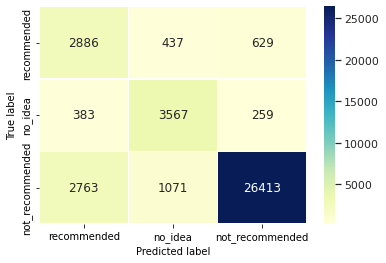

In [26]:
with open(path + 'model-LR.pickle', 'rb') as data:
   classifier = pickle.load(data)
    
y_pred = classifier.predict(X_test)
    
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# predict test set
cm = confusion_matrix(y_test, y_pred)

# plot result for logistic regression

fig, ax = plt.subplots()
counts=["recommended","no_idea","not_recommended"]
dfObj = pd.DataFrame(cm, columns = make_farsi_text(counts), index=make_farsi_text(counts))
import seaborn as sns; sns.set(rc={'figure.figsize':(11.7,8.27)})

ax=sns.heatmap(dfObj, annot=True,cmap="YlGnBu",fmt='g',linewidths=0.5)
ax.set(xlabel='Predicted label', ylabel='True label')
pl.savefig('ConfMatrix.png')
pl.show()

# GB Analyze

In [ ]:
with open(path + 'model-GB-result.pickle', 'rb') as data:
   classifier = pickle.load(data)
    
y_pred = classifier.predict(X_test)
    
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# predict test set
cm = confusion_matrix(y_test, y_pred)

# plot result for logistic regression

fig, ax = plt.subplots()
counts=["recommended","no_idea","not_recommended"]
dfObj = pd.DataFrame(cm, columns = make_farsi_text(counts), index=make_farsi_text(counts))
import seaborn as sns; sns.set(rc={'figure.figsize':(11.7,8.27)})

ax=sns.heatmap(dfObj, annot=True,cmap="YlGnBu",fmt='g',linewidths=0.5)
ax.set(xlabel='Predicted label', ylabel='True label')
pl.savefig('ConfMatrix.png')
pl.show()

# Dimensionality Reduction Plots
We'll perform a dimensionality reduction technique to plot the observations in 2 dimensions.



In [27]:
xt = pd.DataFrame(X_train.toarray())


In [28]:
features = xt
labels = y_train

In [29]:
print(features.shape)
print(labels.shape)

(89460, 11030)
(89460,)


In [31]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    counts=["recommended","no_idea","not_recommended"]

    category=make_farsi_text(counts)
    category_names = {
        "0": category[0],
        "1": category[1],
        "2": category[2],
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen","blue"],
                    alpha=.7).set_title(title);
    plt.savefig('PCA.png')

t-SNE: the t-distributed Stochastic Neighbour Embedding is a probabilistic technique particularly well suited for the visualization of high-dimensional datasets. It minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In [ ]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
